<a href="https://colab.research.google.com/github/theclosedbook/TensorFlow/blob/main/03_Into_to_Compuetr_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Neural Networks and Computer Vison with TensorFlow

Computer Vison is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.
What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

    Getting a dataset to work with
    Architecture of a convolutional neural network
    A quick end-to-end example (what we're working towards)
    Steps in modelling for binary image classification with CNNs
        Becoming one with the data
        Preparing data for modelling
        Creating a CNN model (starting with a baseline)
        Fitting a model (getting it to find patterns in our data)
        Evaluating a model
        Improving a model
        Making a prediction with a trained model
    Steps in modelling for multi-class image classification with CNNs
    Same as above (but this time with a different dataset)


## Get the data

The images we're working on is the Food 101 dataset.

However we've modified it to only two classes i.e. Pizza and Steak

**Note**: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what dosen't work ) before scalling up

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-29 16:48:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 172.253.123.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   150MB/s    in 0.7s    

2024-01-29 16:48:17 (150 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learinng project is becoming one with the data.
And for a computer vision project... this usually means visulizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
# Walk through pizza_steak directory and list the number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find put how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visulaize our images, first let's get the class names programatically

In [7]:
# get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (306, 512, 3)


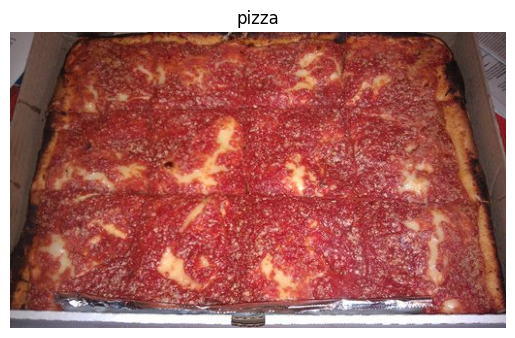

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[122, 107, 110],
        [123, 108, 111],
        [124, 109, 112],
        ...,
        [ 72,  57,  62],
        [ 69,  56,  63],
        [ 88,  75,  82]],

       [[121, 106, 109],
        [121, 106, 109],
        [122, 107, 110],
        ...,
        [ 84,  69,  74],
        [ 86,  73,  80],
        [ 84,  71,  78]],

       [[122, 110, 112],
        [122, 110, 112],
        [122, 110, 112],
        ...,
        [ 98,  83,  88],
        [ 91,  78,  85],
        [ 75,  62,  69]],

       ...,

       [[ 79,  71,  84],
        [ 81,  73,  84],
        [ 83,  75,  86],
        ...,
        [ 96,  92, 115],
        [ 96,  92, 115],
        [ 97,  93, 116]],

       [[ 83,  72,  88],
        [ 83,  75,  88],
        [ 86,  78,  91],
        ...,
        [ 95,  90, 112],
        [ 94,  89, 111],
        [ 90,  85, 107]],

       [[ 83,  72,  88],
        [ 85,  74,  90],
        [ 86,  78,  91],
        ...,
        [ 95,  90, 11

In [11]:
# View the image shape
img.shape # returns width , height , color channels

(306, 512, 3)

**Note**: As we've discussed before, many machine learning moels, including neural networks prefer the va;ues they work with to be between 0&1. Knowing this, one of the most common preprocessing steps for working woth the images is to scale (also reffered to as **normalize**) their pixel values by dividing the image array by 255.(Since 255 is the maximum pixel value).

In [12]:
# Get all the pizel values b/w 0&1
img/255.0

array([[[0.47843137, 0.41960784, 0.43137255],
        [0.48235294, 0.42352941, 0.43529412],
        [0.48627451, 0.42745098, 0.43921569],
        ...,
        [0.28235294, 0.22352941, 0.24313725],
        [0.27058824, 0.21960784, 0.24705882],
        [0.34509804, 0.29411765, 0.32156863]],

       [[0.4745098 , 0.41568627, 0.42745098],
        [0.4745098 , 0.41568627, 0.42745098],
        [0.47843137, 0.41960784, 0.43137255],
        ...,
        [0.32941176, 0.27058824, 0.29019608],
        [0.3372549 , 0.28627451, 0.31372549],
        [0.32941176, 0.27843137, 0.30588235]],

       [[0.47843137, 0.43137255, 0.43921569],
        [0.47843137, 0.43137255, 0.43921569],
        [0.47843137, 0.43137255, 0.43921569],
        ...,
        [0.38431373, 0.3254902 , 0.34509804],
        [0.35686275, 0.30588235, 0.33333333],
        [0.29411765, 0.24313725, 0.27058824]],

       ...,

       [[0.30980392, 0.27843137, 0.32941176],
        [0.31764706, 0.28627451, 0.32941176],
        [0.3254902 , 0

## An end-to-end example
Let's build a convulational neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocessing data(get all of the pixel values between 0 & 1, also called as normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit our model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.5346 - accuracy: 0.7327 - val_loss: 0.3609 - val_accuracy: 0.8320
